Lets try to stabilize:
$$
y'=15y, y(0)= 1.
$$ 
By throwing $15y$ to the other side we would be done.  But we want to use the stabilize technique discussed in last period:
$$
y' + 15y = 30y .
$$ 
which correspond to following integral equation:
$$
y(t)= e^{-15t} + \int_{0}^{t} 30 e^{15(s-t)} y(s)ds.
$$ 
which we implement with russian roulette:

In [5]:
from random import random
from numba import njit, prange
from math import exp

def Y(t):
    if t<1: return 1 + 15*Y(t*random()) if random()<t else 1
    return 1 + 15*t*Y(t*random())

def solnormal(t,nsim): return sum(Y(t) for _ in range(nsim))/nsim

ss = solnormal(1,10**3)
sol = exp(1*15)
print(ss)
print((ss-sol)/sol)

33674.875
-0.9896987775948911


In [3]:
from random import random
from math import exp
from numba import njit, prange

@njit(fastmath=True)
def Ystab(t):
    if random()>t:  return exp(-15.0*t)
    S = random()*t
    return exp(-15.0*t) + 30.0*exp(15.0*(S-t))*Ystab(S) 

@njit(fastmath=True, parallel=True)
def solnormalstab(t,nsim): 
    total = 0.0
    for _ in prange(nsim):
        total += Ystab(t)
    return total/nsim

In [425]:
t,nsim = 1,10**3
ss = solnormalstab(t,nsim)
sol = exp(15*t)
print(ss)
print((ss-sol)/sol)

7.675666734381681
-0.9999976519957345


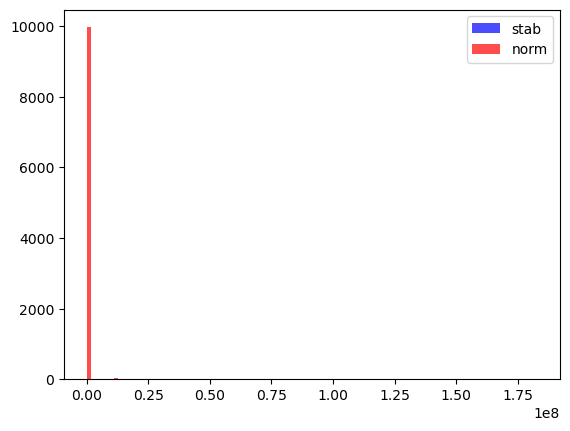

st 230.692543071346
nrm 183063616


In [17]:
import matplotlib.pyplot as plt
nsim = 10**4
stabs = [Ystab(1) for _ in range(nsim)]
norms = [Y(1) for _ in range(nsim)]

plt.hist(stabs,bins = 100,color ="blue",label="stab",alpha=0.7)
plt.hist(norms,bins=100,color="red",label="norm",alpha=0.7)
plt.legend()
plt.show()

print(f"st {max(stabs)}")
print(f"nrm {max(norms)}")

In [ ]:
from random import random

def X():
    if random()<0.5: return 1 if random()<0.5 else 0
    return (X()**2 + (1 if random()<0.5 else 0))/2


print(X())